In [1]:
import numpy as np
import pandas as pd

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly as py
import cufflinks as cf
%matplotlib inline

In [73]:
df = pd.read_csv('resources/911.csv')

In [78]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [80]:
df.head(2)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1

In [81]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [82]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [83]:
df['title'].nunique()

110

In [84]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [85]:
df.head(2)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   

                         addr  e Reason  
0      REINDEER CT & DEAD END  1    EMS  
1  BRIAR PATH & WHITEMARSH LN  1    EMS

In [86]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

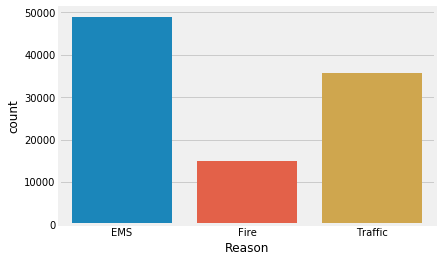

In [87]:
sns.countplot(x='Reason',data=df)

In [88]:
type(df['timeStamp'][0])

str

In [89]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [90]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  
0      REINDEER CT & DEAD END  1    EMS  
1  BRIAR PATH & WHITEMARSH LN  1    EMS  
2                    HAWS AVE  1   Fire  
3          AIRY ST & SWEDE ST  1    EMS  
4    CHERRYWOOD CT & DEAD END  1    EMS

In [91]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [92]:
df['Month'] = df['timeStamp'].apply(lambda x: x.month)

In [93]:
df['DOW'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [94]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [95]:
df['Year'] = df['timeStamp'].apply(lambda x: x.year)

In [96]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [97]:
df['DOW'] = df['DOW'].map(dmap)

In [98]:
df.head(2)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   

                         addr  e Reason  Month  DOW  Hour  Year  
0      REINDEER CT & DEAD END  1    EMS     12  Thu    17  2015  
1  BRIAR PATH & WHITEMARSH LN  1    EMS     12  Thu    17  2015

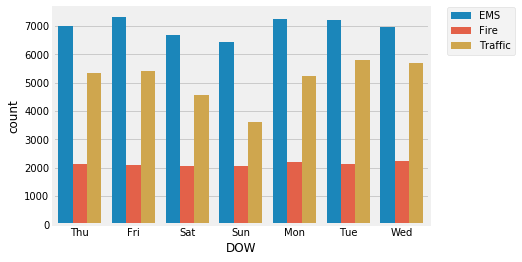

In [99]:
sns.countplot(x='DOW',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

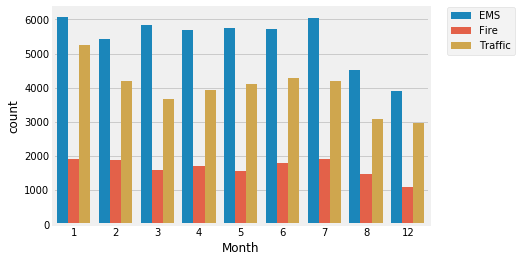

In [100]:
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [102]:
byMonth = df.groupby('Month').count()

In [103]:
byMonth.head()

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   

       Reason    DOW   Hour   Year  
Month                               
1       13205  13205  13205  13205  
2       11467  11467  11467  11467  
3       11101  11101  11101  11101  
4       11326  11326  11326  11326  
5       11423  11423  11423  11423

In [114]:
bm = byMonth.count()

In [115]:
bm

lat          9
lng          9
desc         9
zip          9
title        9
timeStamp    9
twp          9
addr         9
e            9
Reason       9
DOW          9
Hour         9
Year         9
dtype: int64

In [116]:
bm.reset_index(inplace=True)

TypeError: Cannot reset_index inplace on a Series to create a DataFrame

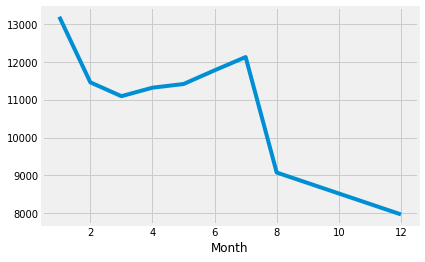

In [110]:
byMonth['e'].plot()

In [118]:
byMonth.reset_index()

Month    lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
0      1  13205  13205  13205  11527  13205      13205  13203  13096  13205   
1      2  11467  11467  11467   9930  11467      11467  11465  11396  11467   
2      3  11101  11101  11101   9755  11101      11101  11092  11059  11101   
3      4  11326  11326  11326   9895  11326      11326  11323  11283  11326   
4      5  11423  11423  11423   9946  11423      11423  11420  11378  11423   
5      6  11786  11786  11786  10212  11786      11786  11777  11732  11786   
6      7  12137  12137  12137  10633  12137      12137  12133  12088  12137   
7      8   9078   9078   9078   7832   9078       9078   9073   9025   9078   
8     12   7969   7969   7969   6907   7969       7969   7963   7916   7969   

   Reason    DOW   Hour   Year  
0   13205  13205  13205  13205  
1   11467  11467  11467  11467  
2   11101  11101  11101  11101  
3   11326  11326  11326  11326  
4   11423  11423  11423  11423  
5   11786  11786  11786  11786  
6   12137  12137  12137  12137  
7    9078   9078   9078   9078  
8    7969   7969   7969   7969

In [34]:
df.index

RangeIndex(start=0, stop=99492, step=1)

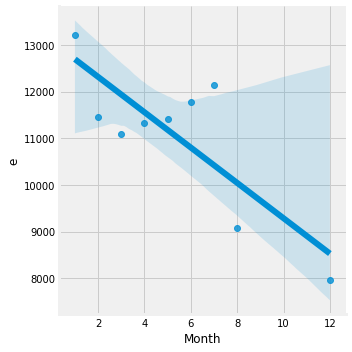

In [121]:
sns.lmplot(x='Month',y='e',data=byMonth.reset_index())

In [123]:
from datetime import datetime

In [124]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [125]:
df.head(2)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   

                         addr  e Reason  Month  DOW  Hour  Year        Date  
0      REINDEER CT & DEAD END  1    EMS     12  Thu    17  2015  2015-12-10  
1  BRIAR PATH & WHITEMARSH LN  1    EMS     12  Thu    17  2015  2015-12-10

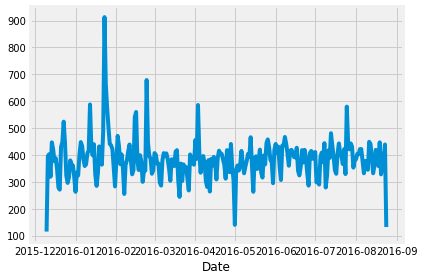

In [128]:
df.groupby('Date').count()['e'].plot()
plt.tight_layout()

In [40]:
df["MonthName"] = df['Date'].apply(lambda x: x.strftime('%B'))

In [41]:
df.head(2)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   

                         addr  e Reason  Month  DOW  Hour  Year        Date  \
0      REINDEER CT & DEAD END  1    EMS     12  Thu    17  2015  2015-12-10   
1  BRIAR PATH & WHITEMARSH LN  1    EMS     12  Thu    17  2015  2015-12-10   

  MonthName  
0  December  
1  December

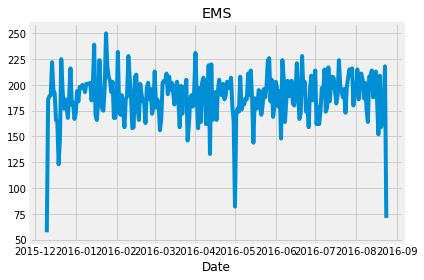

In [132]:
df[df['Reason']=='EMS'].groupby('Date').count()['e'].plot()
plt.title('EMS')
plt.tight_layout()

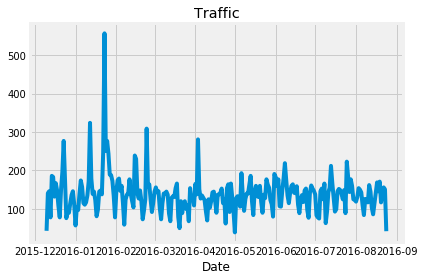

In [133]:
df[df['Reason']=='Traffic'].groupby('Date').count()['e'].plot()
plt.title('Traffic')
plt.tight_layout()

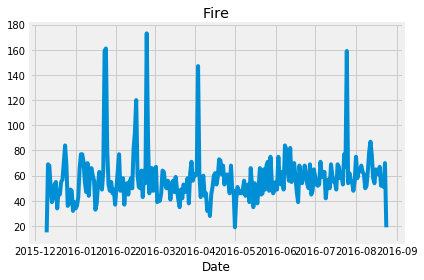

In [134]:
df[df['Reason']=='Fire'].groupby('Date').count()['e'].plot()
plt.title('Fire')
plt.tight_layout()

In [42]:
disp = df.pivot_table(values='e',index='Date',columns='Reason',aggfunc='sum')

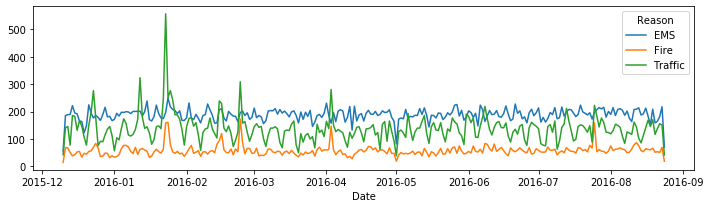

In [43]:
disp.plot(figsize=(10,3))
plt.tight_layout()

In [51]:
dbh = df.pivot_table(values='e',index='DOW',columns='Hour',aggfunc='sum')

In [52]:
dbh

Hour   0    1    2    3    4    5    6    7    8    9   ...   14   15    16  \
DOW                                                     ...                   
Fri   275  235  191  175  201  194  372  598  742  752  ...  932  980  1039   
Mon   282  221  201  194  204  267  397  653  819  786  ...  869  913   989   
Sat   375  301  263  260  224  231  257  391  459  640  ...  789  796   848   
Sun   383  306  286  268  242  240  300  402  483  620  ...  684  691   663   
Thu   278  202  233  159  182  203  362  570  777  828  ...  876  969   935   
Tue   269  240  186  170  209  239  415  655  889  880  ...  943  938  1026   
Wed   250  216  189  209  156  255  410  701  875  808  ...  904  867   990   

Hour    17   18   19   20   21   22   23  
DOW                                       
Fri    980  820  696  667  559  514  474  
Mon    997  885  746  613  497  472  325  
Sat    757  778  696  628  572  506  467  
Sun    714  670  655  537  461  415  330  
Thu   1013  810  698  617  553  424  354  
Tue   1019  905  731  647  571  462  274  
Wed   1037  894  686  668  575  490  335  

[7 rows x 24 columns]

In [138]:
df.groupby(by=['DOW','Hour']).count()['e'].unstack()

Hour   0    1    2    3    4    5    6    7    8    9   ...   14   15    16  \
DOW                                                     ...                   
Fri   275  235  191  175  201  194  372  598  742  752  ...  932  980  1039   
Mon   282  221  201  194  204  267  397  653  819  786  ...  869  913   989   
Sat   375  301  263  260  224  231  257  391  459  640  ...  789  796   848   
Sun   383  306  286  268  242  240  300  402  483  620  ...  684  691   663   
Thu   278  202  233  159  182  203  362  570  777  828  ...  876  969   935   
Tue   269  240  186  170  209  239  415  655  889  880  ...  943  938  1026   
Wed   250  216  189  209  156  255  410  701  875  808  ...  904  867   990   

Hour    17   18   19   20   21   22   23  
DOW                                       
Fri    980  820  696  667  559  514  474  
Mon    997  885  746  613  497  472  325  
Sat    757  778  696  628  572  506  467  
Sun    714  670  655  537  461  415  330  
Thu   1013  810  698  617  553  424  354  
Tue   1019  905  731  647  571  462  274  
Wed   1037  894  686  668  575  490  335  

[7 rows x 24 columns]

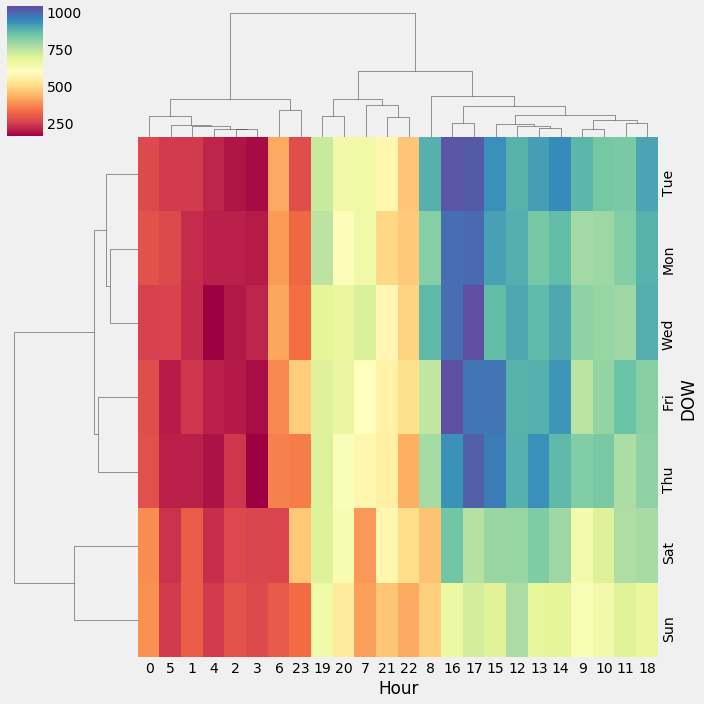

In [71]:
plt.style.use('fivethirtyeight')
sns.clustermap(dbh,cmap='Spectral')

In [68]:
mbd = df.pivot_table(values='e',index='DOW',columns='Month',aggfunc='sum')

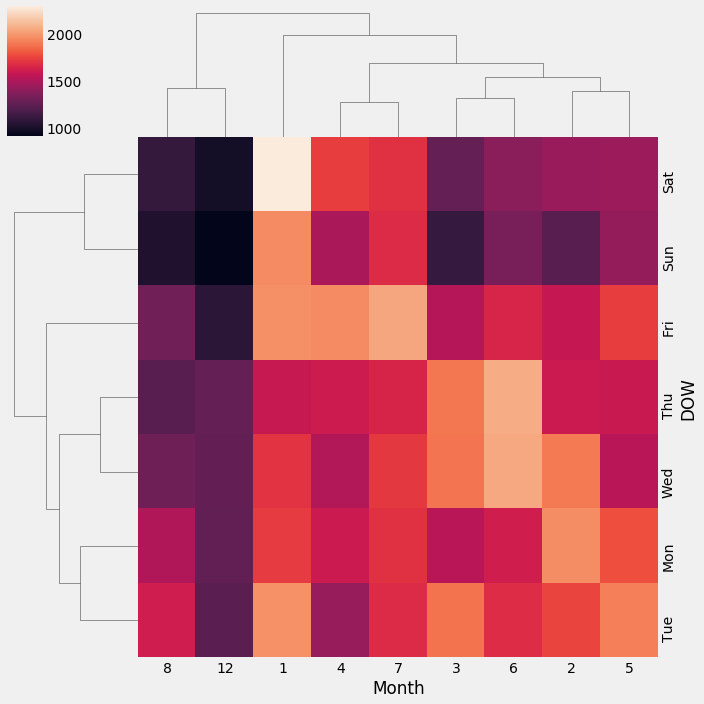

In [70]:
plt.style.use('fivethirtyeight')
sns.clustermap(mbd)